In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# from cmcrameri import cm
# from statsmodels.formula.api import ols
from scipy.special import ndtr
from scipy.optimize import curve_fit, differential_evolution
# from scipy.stats import linregress, ttest_rel, spearmanr, shapiro, sem
# from pathlib import Path
from math import sqrt
# from math import log, e

import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

--------------------------------------

# 2024-05-25: Pre-first-call

## Files Location

Folder name: `results\data\2024-05-25_pre-first-call`
- **MLP data:** `GLOBAL_experiment_2024-05-24_14-10-44\MLP`
- **CNN1 data:** `GLOBAL_experiment_2024-05-24_14-10-44\CNN`
- **CNN2 data:** `CNN_experiment_2024-05-27_17-33-07\CNN`
- **VGG pretrained data:** `GLOBAL_experiment_2024-05-24_14-10-44\VGG`
- **RESNET pretrained data:** `RESNET_exp_2024-05-25_13-38-11\RESNET50`
- **VIT pretrained data:** `VITpretrained_exp_2024-05-25_14-54-52\VITpretrained`

## Metrics

In [2]:
file_path = os.path.join('..','results', 'data','2024-05-25_pre-first-call', 'GLOBAL_experiment_2024-05-24_14-10-44','MLP','MLP_N224_metrics.csv')
df_MLP = pd.read_csv(file_path)
df_MLP['model'] = 'MLP'

In [3]:
# MLP metrics:
file_path = os.path.join('..','results', 'data','2024-05-25_pre-first-call', 'GLOBAL_experiment_2024-05-24_14-10-44','MLP','MLP_N224_metrics.csv')
df_MLP = pd.read_csv(file_path)
df_MLP['model'] = 'MLP'
# CNN1 metrics:
file_path = os.path.join('..','results', 'data','2024-05-25_pre-first-call', 'GLOBAL_experiment_2024-05-24_14-10-44','CNN','CNN_N224_metrics.csv')
df_CNN1 = pd.read_csv(file_path)
df_CNN1['model'] = 'CNN_1'
# CNN2 metrics:
file_path = os.path.join('..','results', 'data','2024-05-25_pre-first-call', 'CNN_experiment_2024-05-27_17-33-07','CNN','CNN_N224_metrics.csv')
df_CNN2 = pd.read_csv(file_path)
df_CNN2['model'] = 'CNN_2'
# VGG metrics:
file_path = os.path.join('..','results', 'data','2024-05-25_pre-first-call', 'GLOBAL_experiment_2024-05-24_14-10-44','VGG16','VGG16_N224_metrics.csv')
df_VGG = pd.read_csv(file_path)
df_VGG['model'] = 'VGG'
# ResNet metrics:
file_path = os.path.join('..','results','data','2024-05-25_pre-first-call', 'RESNET_exp_2024-05-25_13-38-11','RESNET50','RESNET50_N224_metrics.csv')
df_ResNet = pd.read_csv(file_path)
df_ResNet['model'] = 'ResNet'
# ViT metrics:
file_path = os.path.join('..','results','data','2024-05-25_pre-first-call', 'VITpretrained_exp_2024-05-25_14-54-52','VITpretrained','VITpretrained_N224_metrics.csv')
df_ViT = pd.read_csv(file_path)
df_ViT['model'] = 'ViT'

# merging all dfs in a single df:
df_models = pd.concat([df_MLP, df_CNN1, df_CNN2, df_VGG, df_ResNet, df_ViT])
df_models

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model
0,7484,403,12328,5385,0.948903,0.581553,0.721141,0.832706,MLP
0,8569,92,12748,4191,0.989378,0.671552,0.800056,0.879532,CNN_1
0,7432,0,12904,5264,1.000000,0.585381,0.738474,0.875722,CNN_2
0,6784,0,12882,5934,1.000000,0.533417,0.695724,0.847080,VGG
0,6919,126,12695,5860,0.982115,0.541435,0.698043,0.810164,ResNet
0,6934,1,12908,5757,0.999856,0.546371,0.706614,0.862017,ViT


## Psychometric curves

In [4]:
# MLP metrics:
file_path = os.path.join('..','results', 'data', '2024-05-25_pre-first-call', 'GLOBAL_experiment_2024-05-24_14-10-44','MLP','MLP_N224_fraction_correct.csv')
df_MLP = pd.read_csv(file_path)
df_MLP['model'] = 'MLP'
# CNN metrics:
# - CNN1
file_path = os.path.join('..','results', 'data', '2024-05-25_pre-first-call', 'GLOBAL_experiment_2024-05-24_14-10-44','CNN','CNN_N224_fraction_correct.csv')
df_CNN1 = pd.read_csv(file_path)
df_CNN1['model'] = 'CNN1'
# - CNN2
file_path = os.path.join('..','results', 'data', '2024-05-25_pre-first-call', 'CNN_experiment_2024-05-27_17-33-07','CNN','CNN_N224_fraction_correct.csv')
df_CNN2 = pd.read_csv(file_path)
df_CNN2['model'] = 'CNN2'
# VGG metrics:
file_path = os.path.join('..','results', 'data', '2024-05-25_pre-first-call', 'GLOBAL_experiment_2024-05-24_14-10-44','VGG16','VGG16_N224_fraction_correct.csv')
df_VGG = pd.read_csv(file_path)
df_VGG['model'] = 'VGG'
# ResNet metrics:
file_path = os.path.join('..','results','data', '2024-05-25_pre-first-call', 'RESNET_exp_2024-05-25_13-38-11','RESNET50','RESNET50_N224_fraction_correct.csv')
df_ResNet = pd.read_csv(file_path)
df_ResNet['model'] = 'ResNet'
# ViT metrics:
file_path = os.path.join('..','results','data', '2024-05-25_pre-first-call', 'VITpretrained_exp_2024-05-25_14-54-52','VITpretrained','VITpretrained_N224_fraction_correct.csv')
df_ViT = pd.read_csv(file_path)
df_ViT['model'] = 'ViT'

Fitting the data with sigmoid function

In [5]:
# Add the "model" column to each dataframe
df_MLP['model'] = 'MLP'
df_CNN1['model'] = 'CNN1'
df_CNN2['model'] = 'CNN2'
df_VGG['model'] = 'VGG'
df_ResNet['model'] = 'ResNet'
df_ViT['model'] = 'ViT'

# Adding k/sqrt(n) variable
df_MLP['k/sqrt(n)'] = df_MLP['clique size'] / sqrt(100)
df_CNN1['k/sqrt(n)'] = df_CNN1['clique size'] / sqrt(100)
df_CNN2['k/sqrt(n)'] = df_CNN2['clique size'] / sqrt(100)
df_VGG['k/sqrt(n)'] = df_VGG['clique size'] / sqrt(100)
df_ResNet['k/sqrt(n)'] = df_ResNet['clique size'] / sqrt(100)
df_ViT['k/sqrt(n)'] = df_ViT['clique size'] / sqrt(100)

# Concatenate the dataframes
df_models = pd.concat([df_MLP, df_CNN1, df_CNN2, df_VGG, df_ResNet, df_ViT], ignore_index=True)

# Print the concatenated dataframe
df_models


,clique size,fraction correct,model,k/sqrt(n)
0,156,1.0000,MLP,15.6
1,154,1.0000,MLP,15.4
2,152,1.0000,MLP,15.2
3,151,1.0000,MLP,15.1
4,149,1.0000,MLP,14.9
...,...,...,...,...
595,7,0.5000,ViT,0.7
596,5,0.3125,ViT,0.5
597,4,0.4375,ViT,0.4
598,2,0.5625,ViT,0.2


In [6]:
# defining the sigmoid function to fit to the data:
def sigmoid(k, k0, delta):
    return (1+ndtr((k-k0)/delta))/2
# creating unique array and populating it:
fitted_params_models = []
for df in [df_MLP, df_CNN1, df_CNN2, df_VGG, df_ResNet, df_ViT]:
    fitted_params_models.append(curve_fit(sigmoid, df['clique size'], df['fraction correct'], p0=(70, 20))[0])
print(fitted_params_models)  

# put these into a dataframe:
df_fitted_params_models = pd.DataFrame(fitted_params_models, columns=['k0', 'delta'])
df_fitted_params_models['model'] = ['MLP', 'CNN1', 'CNN2', 'VGG', 'ResNet', 'ViT']  
df_fitted_params_models

[array([67.02906591, 20.7079889 ]), array([51.32619871,  9.14362111]), array([62.33700035,  5.9218798 ]), array([73.46994428,  7.83519517]), array([70.90417058,  8.63527424]), array([70.12032469,  6.05282239])]


,k0,delta,model
0,67.029066,20.707989,MLP
1,51.326199,9.143621,CNN1
2,62.337000,5.921880,CNN2
3,73.469944,7.835195,VGG
4,70.904171,8.635274,ResNet
5,70.120325,6.052822,ViT


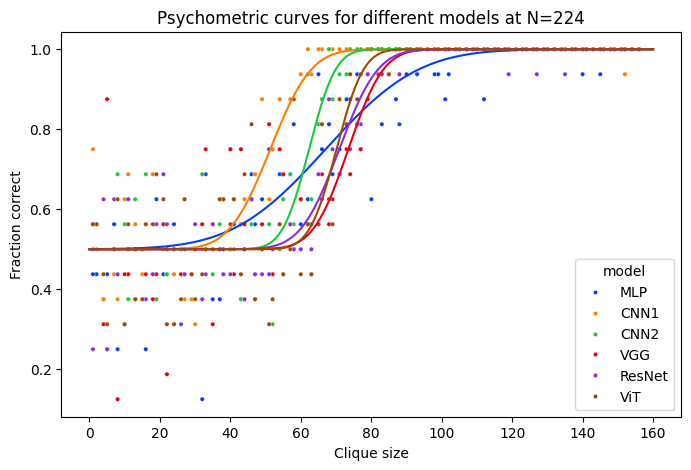

In [7]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
model_names = ['MLP', 'CNN1', 'CNN2', 'VGG', 'ResNet', 'ViT']

# defining x values
x_vals = np.linspace(0, 160, 1000)

# creating palette for the graph
my_palette_models = sns.color_palette("bright", len(model_names))

# Scatter plot based on unique dataframe:
sns.scatterplot(data=df_models, x='clique size', y='fraction correct', hue='model', palette=my_palette_models, ax=ax, s=10)

# defining y values for each N value and plotting it
for index, model in enumerate(model_names):
    y_vals = (1 + ndtr((x_vals - fitted_params_models[index][0]) / fitted_params_models[index][1])) / 2
    ax.plot(x_vals, y_vals, color=my_palette_models[index])

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("Clique size")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Psychometric curves for different models at N=224")

# saving figure in folder "figures" with 300dpi
# fig.savefig(os.path.join(os.path.dirname(__file__), '..','results','plots','models_comparison_fc_over_n.png'), dpi=300)

# Show the plot
plt.show()

---------------------

# 2024-06-25: Rudy experiment replication (N=100)

## Files Location

Folder name: `results\data\2024-06-25_rudy-exp-N100`
- **CNN_rudy data:** `rudy_exp_2024-06-25_14-58-34\CNN_rudy`


NOTE: in this case, the training set was generated once per training cycle, while the validation sets were generated at each save_step

## Metrics

In [2]:
file_path = os.path.join('..','results', 'data','2024-06-25_rudy-exp-N100', 'rudy_exp_2024-06-25_14-58-34','CNN_rudy','CNN_rudy_N100_metrics.csv')
df_CNN_rudy_metric = pd.read_csv(file_path)
df_CNN_rudy_metric['model'] = 'CNN_rudy'
df_CNN_rudy_metric

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model
0,10078,0,28755,18767,1.0,0.349385,0.517843,0.833743,CNN_rudy


## Psychometric curve

In [3]:
file_path = os.path.join('..','results', 'data','2024-06-25_rudy-exp-N100', 'rudy_exp_2024-06-25_14-58-34','CNN_rudy','CNN_rudy_N100_fraction_correct.csv')
df_CNN_rudy = pd.read_csv(file_path)
df_CNN_rudy['model'] = 'CNN_rudy'
df_CNN_rudy

,clique size,fraction correct,model
0,70,1.000000,CNN_rudy
1,69,1.000000,CNN_rudy
2,68,1.000000,CNN_rudy
3,67,1.000000,CNN_rudy
4,66,1.000000,CNN_rudy
...,...,...,...
65,5,0.506944,CNN_rudy
66,4,0.486111,CNN_rudy
67,3,0.472222,CNN_rudy
68,2,0.486111,CNN_rudy


Fitting the data with sigmoid function

In [4]:
# defining the sigmoid function to fit to the data:
def sigmoid(k, k0, delta):
    return (1+ndtr((k-k0)/delta))/2
# creating unique array and populating it:
fitted_params_CNN_rudy = []
for df in [df_CNN_rudy]:
    fitted_params_CNN_rudy.append(curve_fit(sigmoid, df['clique size'], df['fraction correct'], p0=(70, 20))[0])
print(fitted_params_CNN_rudy)  

# put these into a dataframe:
df_fitted_params_CNN_rudy = pd.DataFrame(fitted_params_CNN_rudy, columns=['k0', 'delta'])
df_fitted_params_CNN_rudy['model'] = ['CNN_rudy']  
df_fitted_params_CNN_rudy

[array([45.36982865,  3.55189122])]


,k0,delta,model
0,45.369829,3.551891,CNN_rudy


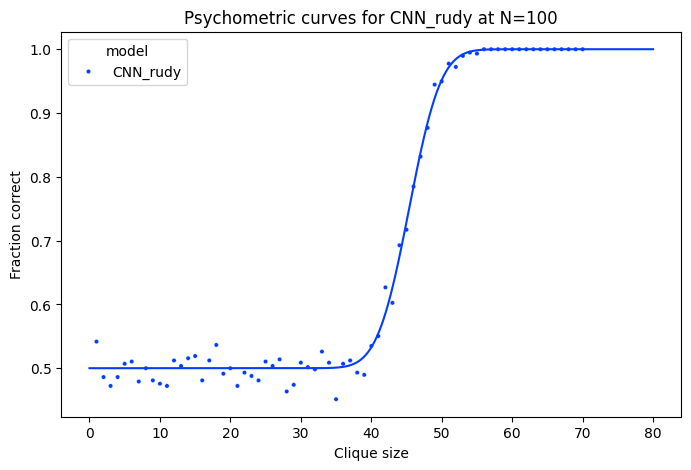

In [8]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
model_names = ['CNN_rudy']

# defining x values
x_vals = np.linspace(0, 80, 1000)

# creating palette for the graph
my_palette_models = sns.color_palette("bright", len(model_names))

# Scatter plot based on unique dataframe:
sns.scatterplot(data=df_CNN_rudy, x='clique size', y='fraction correct', hue='model', palette=my_palette_models, ax=ax, s=10)

# defining y values for each N value and plotting it
for index, model in enumerate(model_names):
    y_vals = (1 + ndtr((x_vals - fitted_params_CNN_rudy[index][0]) / fitted_params_CNN_rudy[index][1])) / 2
    ax.plot(x_vals, y_vals, color=my_palette_models[index])

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("Clique size")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Psychometric curves for CNN_rudy at N=100")

# saving figure in folder "figures" with 300dpi
# fig.savefig(os.path.join('..','results','plots','2024-06-25_rudy-exp-N100','CNN_rudy_fc_over_n.png'), dpi=300)

# Show the plot
plt.show()

Graph for comparison with Rudy's graph (https://colab.research.google.com/drive/1LNuoEQZFk8Om3zISlly9XY-fmepTKsVW#scrollTo=k8CeY9iXNY_z)

In [6]:
# adding k/sqrt(n) variable to dataframe:
df_CNN_rudy['k/sqrt(n)'] = df_CNN_rudy['clique size'] / sqrt(100)
df_CNN_rudy

,clique size,fraction correct,model,k/sqrt(n)
0,70,1.000000,CNN_rudy,7.0
1,69,1.000000,CNN_rudy,6.9
2,68,1.000000,CNN_rudy,6.8
3,67,1.000000,CNN_rudy,6.7
4,66,1.000000,CNN_rudy,6.6
...,...,...,...,...
65,5,0.506944,CNN_rudy,0.5
66,4,0.486111,CNN_rudy,0.4
67,3,0.472222,CNN_rudy,0.3
68,2,0.486111,CNN_rudy,0.2


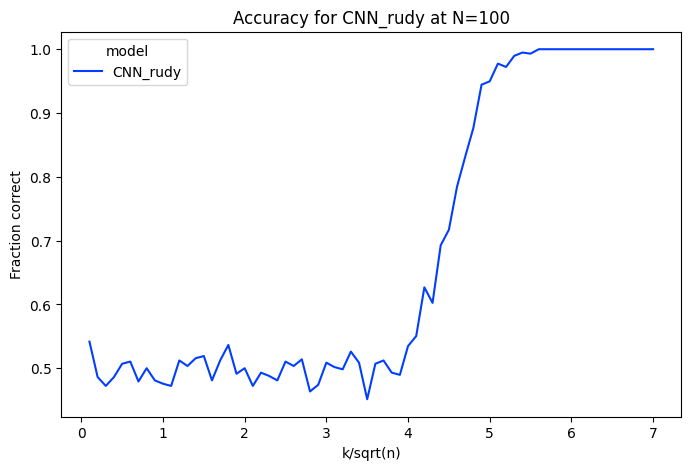

In [9]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
model_names = ['CNN_rudy']

# creating palette for the graph
my_palette_models = sns.color_palette("bright", len(model_names))

# Scatter plot based on unique dataframe:
sns.lineplot(data=df_CNN_rudy, x='k/sqrt(n)', y='fraction correct', hue='model', palette=my_palette_models, ax=ax)

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("k/sqrt(n)")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Accuracy for CNN_rudy at N=100")

# saving figure in folder "figures" with 300dpi
# fig.savefig(os.path.join('..','results','plots','2024-06-25_rudy-exp-N100','CNN_rudy_fc_over_sqrtn.png'), dpi=300)

# Show the plot
plt.show()